# Uber Rides Exploratory Data Analysis 

In [135]:
#Importing required libraries:

import pandas as pd               #for analyzing data             
import seaborn as sns             #for visualizing data          
import matplotlib.pyplot as plt   #for visualizing data 
%matplotlib inline  

import warnings 
warnings.filterwarnings(action= 'ignore')

In [136]:
#Reading data:

data = pd.read_csv('Uber_drives_data.csv')
print(data.shape)                  #printing the number of rows and columns respectively
data.head(5)                       #printing the top 5 rows

(1155, 7)


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


The dataset has 1155 rows and 7 columns.

In [137]:
#Renaming column names for clarity:

data.columns = ['Start_Date','End_Date','Category','Start_Point','Stop_Point','Miles','Purpose']
data.head(5)    #printing top 5 rows

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


The given dataset has 1155 rows and 7 columns, containing all the information about the Uber rides. The user has booked 1155 rides over the year.

In [138]:
#Understanding the data more:

data.describe()    #for statistical description of data

,Miles
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


Here, as maximum miles is more than (mean + 3*standard deviation) value, it seems that the dataset has outliers present in it.

In [139]:
#Checking the need for data cleaning:

data.info()      #gathering information about the non null count and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Start_Date   1155 non-null   object 
 1   End_Date     1155 non-null   object 
 2   Category     1155 non-null   object 
 3   Start_Point  1155 non-null   object 
 4   Stop_Point   1155 non-null   object 
 5   Miles        1155 non-null   float64
 6   Purpose      653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Out of 1155 values in Purpose column, only 653 have some values. Rest have null values.

In [140]:
#Checking if there is any duplicate value:

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1150    False
1151    False
1152    False
1153    False
1154    False
Length: 1155, dtype: bool

The dataset does not have any duplicate values.

In [141]:
data.isnull().sum()     #Counting number of null values

Start_Date       0
End_Date         0
Category         0
Start_Point      0
Stop_Point       0
Miles            0
Purpose        502
dtype: int64

Clearly, the dataset does have null values. The data needs to be cleaned in order to do its analysis and visualization.

<AxesSubplot:>

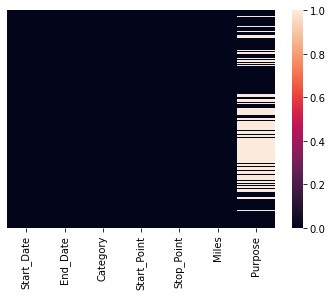

In [142]:
sns.heatmap(data.isnull(), yticklabels = False)   #Visualization of null values

Clearly, the 'Purpose' column contains a lot of null values. The null values in Purpose column can't be dropped as doing this leads to working with approximately half of the data. 

In [143]:
#Setting null values in the Purpose column to 'Unknown' as the purpose is not mentioned for them

data['Purpose'] = data['Purpose'].fillna('Unknown')
data.head()


,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [144]:
#Checking if data is cleaned or not:

data.isnull().sum()

Start_Date     0
End_Date       0
Category       0
Start_Point    0
Stop_Point     0
Miles          0
Purpose        0
dtype: int64

Clearly, there are no null values left.

<AxesSubplot:>

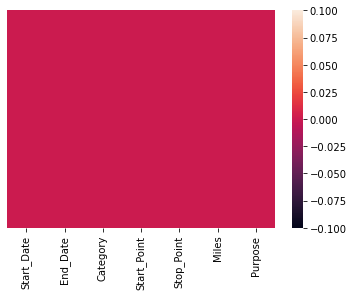

In [145]:
sns.heatmap(data.isnull(), yticklabels = False)

Clearly, there are no null values left.

<AxesSubplot:>

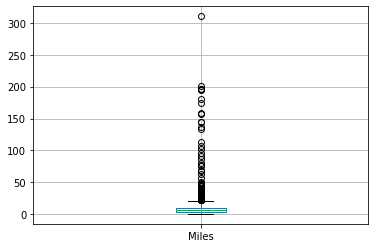

In [146]:
#Identifying outliers in data

data[['Miles']].boxplot()

Clearly, the miles column has a lot of outliers which need to be removed.

Text(0.5, 1.0, 'Distribution of Miles')

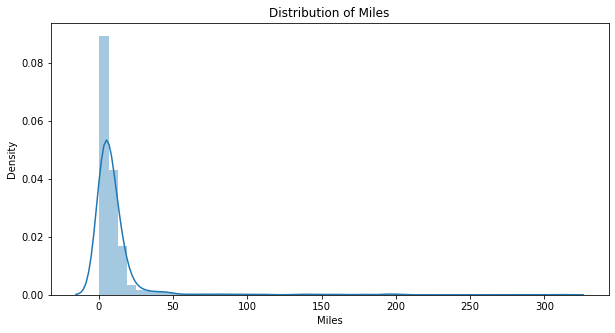

In [147]:
#Checking the distribution of miles of the Uber rides:

plt.figure(figsize=(10,5))
sns.distplot(data.Miles)
plt.title("Distribution of Miles")

The distribution plot clearly shows that outliers are present and the data is positively skewed.

In [148]:
#Skewness of Miles column values
data.Miles.skew()

7.221969847564774

The distribution of Miles column values is highly skewed towards right. This means the outliers are present towards the right. A positive skew indicates that the dataset has many values much greater than the mean and it has very less values lesser than the mean. 

In [149]:
#Identifying outliers from the Miles column

Miles_mean = data.Miles.mean()
print(Miles_mean)

Miles_std_dev = data.Miles.std()
print(Miles_std_dev)

print(Miles_mean+3*Miles_std_dev)
print(Miles_mean-3*Miles_std_dev)

data [(data.Miles> Miles_mean+3*Miles_std_dev) | (data.Miles < Miles_mean-3*Miles_std_dev)]


10.566839826839812
21.579105610060115
75.30415665702016
-54.17047700334054


,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
232,3/17/2016 12:52,3/17/2016 15:11,Business,Austin,Katy,136.0,Customer Visit
268,3/25/2016 13:24,3/25/2016 16:22,Business,Cary,Latta,144.0,Customer Visit
269,3/25/2016 16:52,3/25/2016 22:22,Business,Latta,Jacksonville,310.3,Customer Visit
270,3/25/2016 22:54,3/26/2016 1:39,Business,Jacksonville,Kissimmee,201.0,Meeting
295,04-02-2016 12:21,04-02-2016 14:47,Business,Kissimmee,Daytona Beach,77.3,Customer Visit
296,04-02-2016 16:57,04-02-2016 18:09,Business,Daytona Beach,Jacksonville,80.5,Customer Visit
297,04-02-2016 19:38,04-02-2016 22:36,Business,Jacksonville,Ridgeland,174.2,Customer Visit
298,04-02-2016 23:11,04-03-2016 01:34,Business,Ridgeland,Florence,144.0,Meeting
299,04-03-2016 02:00,04-03-2016 04:16,Business,Florence,Cary,159.3,Meeting
546,7/14/2016 16:39,7/14/2016 20:05,Business,Morrisville,Banner Elk,195.3,Unknown


These are the values in the dataset which are outliers.

In [150]:
#Removing outliers from the dataset

data1 = data [(data.Miles < Miles_mean+3*Miles_std_dev) & (data.Miles > Miles_mean-3*Miles_std_dev)]
data1


,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


The dataset reduced from 1155 to 1133 rows.

<AxesSubplot:>

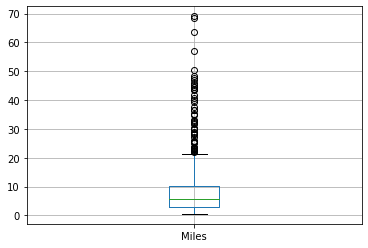

In [151]:
#Checking if outliers are removed or not 

data1[['Miles']].boxplot()

Text(0.5, 1.0, 'Distribution of Miles')

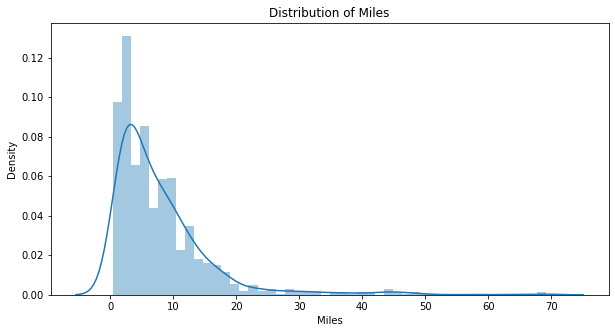

In [152]:
#Checking the distribution of miles of the Uber rides after removing outliers:

plt.figure(figsize=(10,5))
sns.distplot(data1.Miles)
plt.title("Distribution of Miles")

In [153]:
data1.Miles.skew()

3.0401544881339007

The distribution of the Miles column values is rightly skewed and the skewness has decreased after removing the outliers.. 

In [154]:
data1.describe()    #for statistical description of data

,Miles
count,1133.000000
mean,7.985613
std,8.078931
min,0.500000
25%,2.800000
50%,5.800000
75%,10.300000
max,69.100000


The dataset after the removal of Miles outliers indicates that the average miles that the user covers is around 8 miles. The minimum distance of the ride is 0.5 miles while the maximum distance of the ride is 69.1 miles.

At this stage, in the data, the start and end dates are given, but not the duration of the rides. The duration is needed in order to know how much time did the rides took. For this, it is needed to convert the Start Date and End Date data objects into datetime objects.

In [155]:
#Converting the Start_Date and End_Date date objects into datetime objects to get duration (Conversion to datetime object will lead to transformation of timing to HH:MM:DD format which will help in calculating the ride duration later):
#Using Pandas library

data1['Start_Date'] = pd.to_datetime(data1['Start_Date'])
data1['End_Date'] = pd.to_datetime(data1['End_Date'])

data1.head(5)

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [156]:
#Calculating duration of the rides:

data1['Ride_Duration'] = data1['End_Date'] - data1['Start_Date']

data1.head()

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In the dataset, the ride_duration is given in terms of days and time. Days need to be removed from the duration.

In [157]:
#Removing days from the Ride_Duration: (First converting the Ride_Duration into string type and then slicing the remaining part after days)

data1['Ride_Duration'] = data1['Ride_Duration'].astype(str).map(lambda x: x[7:])

data1.head(5)

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,01:07:00


Segregating year, month, week day and day hour to get more information about the rides is needed.

In [158]:
#Creating new columns of year, month, day of the week and day hour:
#Converting the datetime format of the Start Date into different columns:

data1['Year'] = data1['Start_Date'].apply(lambda conversion: conversion.year)
data1['Month'] = data1['Start_Date'].apply(lambda conversion: conversion.month)
data1['Day'] = data1['Start_Date'].apply(lambda conversion: conversion.dayofweek)
data1['Hour'] = data1['Start_Date'].apply(lambda conversion: conversion.hour)

data1.head()

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration,Year,Month,Day,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00,2016,1,4,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,00:12:00,2016,1,5,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00,2016,1,5,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00,2016,1,1,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,01:07:00,2016,1,2,14


For proper analysis, the Month and Day columns need to be in words, for example, 0 means Monday, 1 means Tuesday etc. in Day of the week column while in month column, 1 means January, 2 means February etc.

In [159]:
#Creating a dictionary for Month column:

A = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
data1['Month'] = data1['Month'].map(A)

data1.head(5)

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration,Year,Month,Day,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00,2016,January,4,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,00:12:00,2016,January,5,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00,2016,January,5,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00,2016,January,1,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,01:07:00,2016,January,2,14


In [160]:
#Creating a dictionary for Day of the week column:
B = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data1['Day'] = data1['Day'].map(B)

data1.head(5)

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration,Year,Month,Day,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00,2016,January,Friday,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,00:12:00,2016,January,Saturday,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00,2016,January,Saturday,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00,2016,January,Tuesday,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,01:07:00,2016,January,Wednesday,14


Here, 00:06:00 means 6 minutes duration while 01:07:00 means 1 hour, 7 minutes duration. 
The dataset is now ready for visualization.

In [161]:
data1.describe()

,Miles,Year,Hour
count,1133.000000,1133.0,1133.000000
mean,7.985613,2016.0,14.673433
std,8.078931,0.0,4.575744
min,0.500000,2016.0,0.000000
25%,2.800000,2016.0,12.000000
50%,5.800000,2016.0,15.000000
75%,10.300000,2016.0,18.000000
max,69.100000,2016.0,23.000000


<AxesSubplot:>

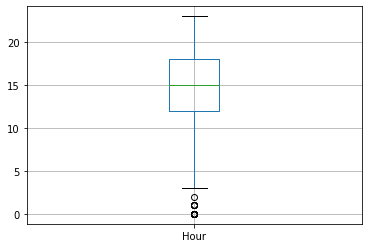

In [162]:
#Identifying outliers in the Hour column

data1[["Hour"]].boxplot()

It seems that the Hour column has some outliers.

Text(0.5, 1.0, 'Distribution of Hours')

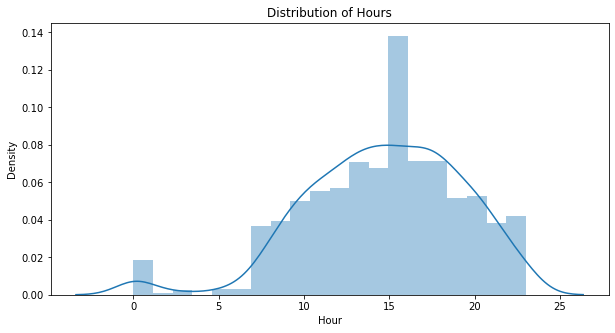

In [163]:
#Checking the distribution of hours of the Uber rides:

plt.figure(figsize=(10,5))
sns.distplot(data1.Hour)
plt.title("Distribution of Hours")

The distribution of hours seems to be a normal distribution and very slightly left skewed.

In [164]:
#Skewness of Hour column values:

data1.Hour.skew()

-0.5909206930122288

The distribution of hours is very slightly left skewed.

In [165]:
#Identifying outliers from the Hour column

Hour_mean = data1.Hour.mean()
print(Hour_mean)

Hour_std_dev = data1.Hour.std()
print(Hour_std_dev)

print(Hour_mean+3*Hour_std_dev)
print(Hour_mean-3*Hour_std_dev)

data1 [(data1.Hour> Miles_mean+3*Hour_std_dev) | (data1.Hour < Hour_mean-3*Hour_std_dev)]

14.673433362753752
4.575743615271999
28.400664208569747
0.9462025169377561


,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration,Year,Month,Day,Hour
27,2016-01-15 00:41:00,2016-01-15 01:01:00,Business,Morrisville,Cary,8.0,Errand/Supplies,00:20:00,2016,January,Friday,0
103,2016-02-14 00:50:00,2016-02-14 01:00:00,Personal,Jackson Heights,East Elmhurst,1.8,Unknown,00:10:00,2016,February,Sunday,0
231,2016-03-17 00:33:00,2016-03-17 00:44:00,Personal,Downtown,The Drag,1.7,Unknown,00:11:00,2016,March,Thursday,0
274,2016-03-27 00:31:00,2016-03-27 00:40:00,Business,Lake Reams,Lake Reams,2.1,Errand/Supplies,00:09:00,2016,March,Sunday,0
301,2016-04-06 00:19:00,2016-04-06 00:39:00,Business,Wayne Ridge,Whitebridge,8.0,Meal/Entertain,00:20:00,2016,April,Wednesday,0
386,2016-05-28 00:15:00,2016-05-28 00:21:00,Business,Kilarney Woods,Whitebridge,4.7,Errand/Supplies,00:06:00,2016,May,Saturday,0
454,2016-06-18 00:29:00,2016-06-18 00:51:00,Business,Morrisville,Cary,8.7,Unknown,00:22:00,2016,June,Saturday,0
489,2016-06-28 00:48:00,2016-06-28 01:05:00,Business,Morrisville,Cary,8.2,Customer Visit,00:17:00,2016,June,Tuesday,0
500,2016-07-01 00:00:00,2016-07-01 00:25:00,Business,Durham,Cary,9.9,Meeting,00:25:00,2016,July,Friday,0
507,2016-07-03 00:28:00,2016-07-03 00:38:00,Business,Cary,Morrisville,3.1,Errand/Supplies,00:10:00,2016,July,Sunday,0


These are the outliers present in the Hour column which need to be removed.

In [166]:
#Removing outliers from the Hour column in the dataset

data2 = data1 [(data1.Hour < Hour_mean+3*Hour_std_dev) & (data1.Hour > Hour_mean-3*Hour_std_dev)]
data2


,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration,Year,Month,Day,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00,2016,January,Friday,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,00:12:00,2016,January,Saturday,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00,2016,January,Saturday,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00,2016,January,Tuesday,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,01:07:00,2016,January,Wednesday,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,00:07:00,2016,December,Saturday,1
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,00:18:00,2016,December,Saturday,13
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,00:35:00,2016,December,Saturday,15
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,00:18:00,2016,December,Saturday,21


The final dataset has reduced to 1114 rows. This is the dataset which will be visualized for analysis.

Text(0.5, 1.0, 'Distribution of Hours')

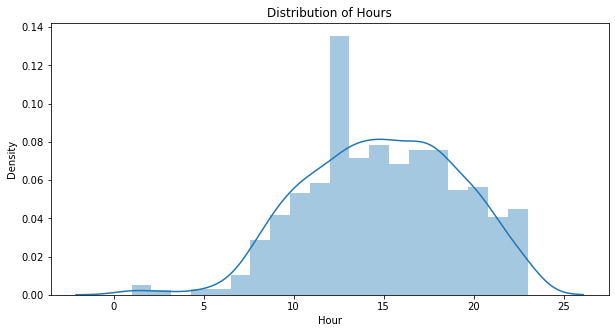

In [167]:
#Checking the distribution of the Hours after removing outliers:

plt.figure(figsize=(10,5))
sns.distplot(data2.Hour)
plt.title("Distribution of Hours")

In [168]:
data2.Hour.skew()

-0.2279924452895587

The skewness of the hours distribution decreases slightly.

<AxesSubplot:>

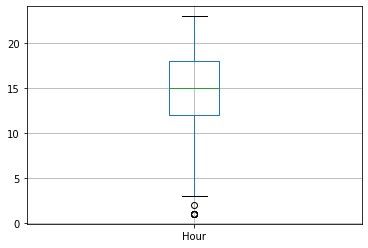

In [169]:
data2[["Hour"]].boxplot()

The dataset is now outliers free and can be used for visualization.

### Visualizing the data

In [170]:
#Average number of rides per day

ride_count = data2['Miles'].count() 
Average_ride_per_day = ride_count/366    #Year is 2016 which is a leap year
print('Average number of rides per day is' , Average_ride_per_day)

Average number of rides per day is 3.0437158469945356


The user covers an average of 3 rides per day. He seems to be a potential customer for Uber.

Text(0, 0.5, 'Number of rides')

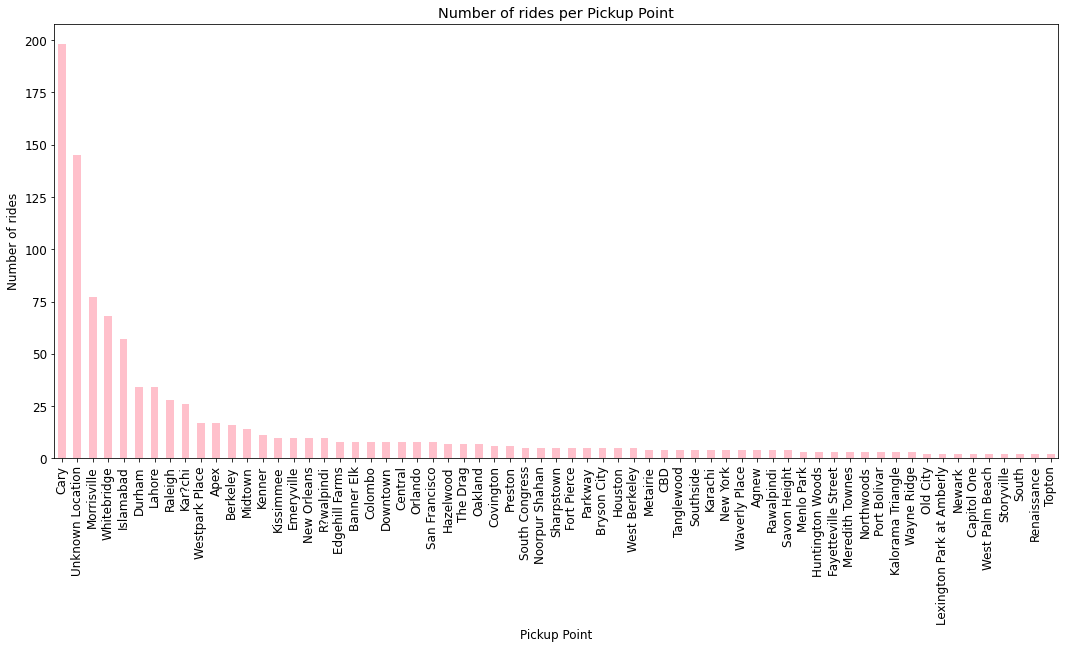

In [221]:
#Checking the most common pickup points of the Uber rides:

a = data2.Start_Point.value_counts().nlargest(65)
a.plot(kind='bar', figsize=(18,8),color=['pink'])
plt.title('Number of rides per Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of rides')

Most of the Uber rides have started from Cary and mostly pickup points are unknown.

Text(0, 0.5, 'Number of rides')

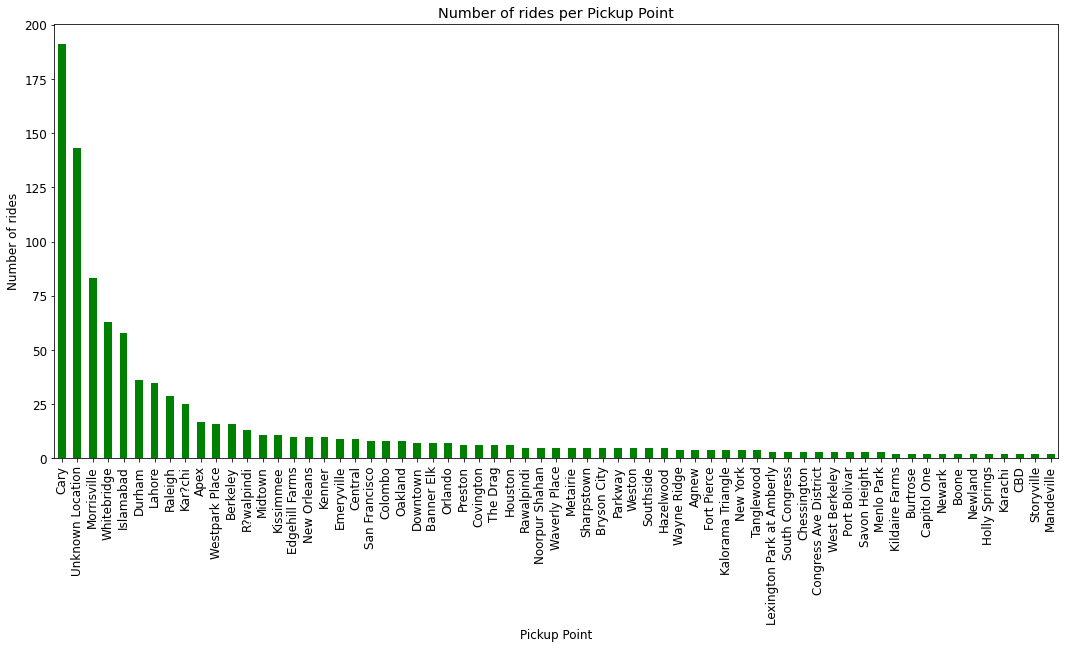

In [222]:
#Checking the most common dropoff points of the Uber rides:

b = data2.Stop_Point.value_counts().nlargest(65)
b.plot(kind='bar', figsize=(18,8),color=['green'])
plt.title('Number of rides per Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of rides')

Most of the Uber rides have ended at Cary and mostly dropoff points are unknown. There is a possibility of round rides because most of the pickup and dropoff locations are similar.

In [173]:
#Checking the rides which have similar pickup and dropoff locations

Required_Mile = data2.loc[data2['Start_Point'] == data2['Stop_Point']]
Required_Mile

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Ride_Duration,Year,Month,Day,Hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00,2016,January,Friday,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,00:12:00,2016,January,Saturday,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00,2016,January,Saturday,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00,2016,January,Tuesday,17
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,00:04:00,2016,January,Wednesday,17
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2016-12-30 15:41:00,2016-12-30 16:03:00,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies,00:22:00,2016,December,Friday,15
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4.6,Meeting,00:23:00,2016,December,Friday,16
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,00:04:00,2016,December,Friday,23
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,00:07:00,2016,December,Saturday,1


For around 25% rides (281 out of 1114 rides), the starting and ending locations are similar. This means that about 25% of the rides are round rides.

Text(0, 0.5, 'Number of rides')

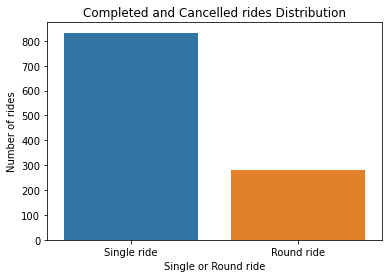

In [174]:
#Distribution of single and round rides

def Single_or_Round_rides(data2):
    if data2['Start_Point'] == data2['Stop_Point']:
        return 'Round ride'
    else:
        return 'Single ride'
    
data2['Single or Round ride'] = data2.apply(Single_or_Round_rides, axis=1)

sns.countplot(x='Single or Round ride',data=data2, order=data2['Single or Round ride'].value_counts().index)
plt.title('Single and Round rides Distribution')
plt.title('Completed and Cancelled rides Distribution')
plt.ylabel("Number of rides")


Clearly, the user has coovered 250+ round rides.

Text(0.5, 1.0, 'Purpose of Uber rides')

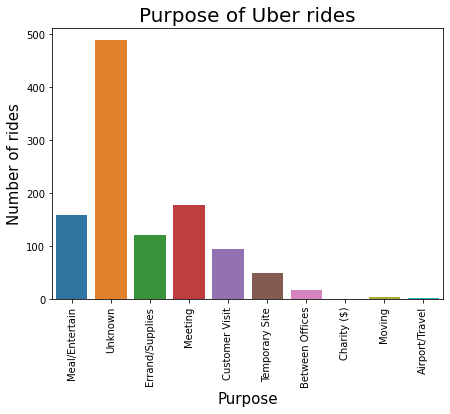

In [175]:
#To know for what purpose the user uses Uber for:

plt.figure(figsize=(7,5))
a = sns.countplot(x='Purpose', data = data2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_xlabel("Purpose", fontsize = 15)
a.set_ylabel("Number of rides", fontsize = 15)
a.set_title('Purpose of Uber rides', fontsize = 20)

It is evident that for most of the rides, the purpose is unknown. For other rides, the user prefers Uber rides to go for any meeting and for meal/entertainment purposes.

Text(0.5, 1.0, 'Category of Uber rides')

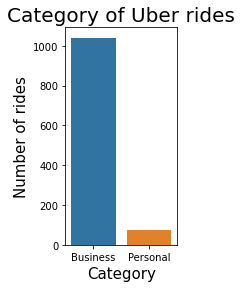

In [176]:
#To know for what category the user uses Uber for:

plt.figure(figsize=(2,4))
a = sns.countplot(x='Category', data = data2)
a.set_xticklabels(a.get_xticklabels())
a.set_xlabel("Category", fontsize = 15)
a.set_ylabel("Number of rides", fontsize = 15)
a.set_title('Category of Uber rides', fontsize = 20)

The user prefers Uber rides for his/her business work for 1000+ rides and for very small number of rides, the user travels for personal reasons.

In [177]:
#Checking the maximum and minimum durations of Uber rides:
a = data2['Ride_Duration'].max()
print('Maximum ride duration is:', a)

b = data2['Ride_Duration'].min()
print('Minimum ride duration is:', b)


Maximum ride duration is: 02:47:00
Minimum ride duration is: 00:00:00


As the minimum ride duration is 00:00:00, it means that ride(s) would be cancelled for some reasons.

In [178]:
#Number of cancelled rides:
ride_cancelled = data2[(data2.Ride_Duration == '00:00:00')].count()
print(ride_cancelled)

#Number of completed rides:
ride_completed = data2[(data2.Ride_Duration != '00:00:00')].count()
print(ride_completed)

print('The ride cancellation percentage is ', (ride_cancelled*100/(ride_cancelled + ride_completed)), '%')

Start_Date              4
End_Date                4
Category                4
Start_Point             4
Stop_Point              4
Miles                   4
Purpose                 4
Ride_Duration           4
Year                    4
Month                   4
Day                     4
Hour                    4
Single or Round ride    4
dtype: int64
Start_Date              1110
End_Date                1110
Category                1110
Start_Point             1110
Stop_Point              1110
Miles                   1110
Purpose                 1110
Ride_Duration           1110
Year                    1110
Month                   1110
Day                     1110
Hour                    1110
Single or Round ride    1110
dtype: int64
The ride cancellation percentage is  Start_Date              0.359066
End_Date                0.359066
Category                0.359066
Start_Point             0.359066
Stop_Point              0.359066
Miles                   0.359066
Purpose                 

There are 4 cancelled rides and 1110 completed rides. The ride cancellation percentage is very low (approx. 0.36%)

Text(0, 0.5, 'Number of rides')

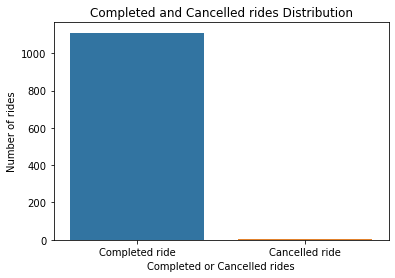

In [179]:
#Distribution of completed and cancelled rides

def Completed_or_Cancelled_rides(data2):
    if data2['Ride_Duration'] != "00:00:00":
        return 'Completed ride'
    else:
        return 'Cancelled ride'
    
data2['Completed or Cancelled rides'] = data2.apply(Completed_or_Cancelled_rides, axis=1)

sns.countplot(x='Completed or Cancelled rides',data=data2, order=data2['Completed or Cancelled rides'].value_counts().index)
plt.title('Completed and Cancelled rides Distribution')
plt.ylabel("Number of rides")



It is clear that a very few rides have been cancelled by the user.

In [180]:
#Checking the maximum and minimum distance of Uber rides:

a = data2['Miles'].max()
print('Maximum ride distance is:', a, 'miles.')

b = data2['Miles'].min()
print('Minimum ride distance is:', b, 'miles.')


Maximum ride distance is: 69.1 miles.
Minimum ride distance is: 0.5 miles.


The maximum ride distance covered by the user is 69.1 miles while the minimum ride distance is 0.5 miles.

In [181]:
#Checking the number of rides for which the distance covered is <= 1 miles or 1.6 km i.e. very short rides

Required_Duration = data2.loc[data2['Miles'] <= 1.0]
Required_Duration.count()


Start_Date                      40
End_Date                        40
Category                        40
Start_Point                     40
Stop_Point                      40
Miles                           40
Purpose                         40
Ride_Duration                   40
Year                            40
Month                           40
Day                             40
Hour                            40
Single or Round ride            40
Completed or Cancelled rides    40
dtype: int64

The user has covered 40 very short rides out of 1114 rides.

In [182]:
#Determining the number of rides booked per month:

data2.groupby("Month")["Miles"].count()

Month
April         48
August       130
December     143
February     114
January       60
July         103
June         106
March        107
May           48
November     122
October       98
September     35
Name: Miles, dtype: int64

Text(0.5, 1.0, 'Number of Uber rides per month')

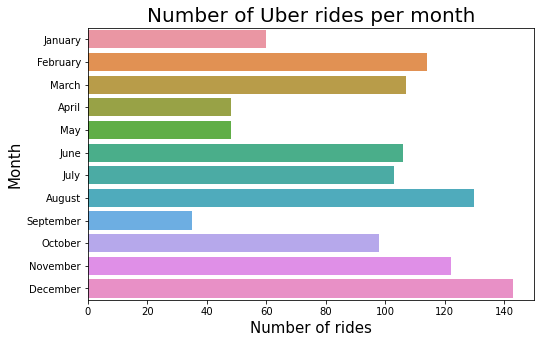

In [183]:
#Checking the number of rides per month:

plt.figure(figsize=(8,5))
a = sns.countplot(y='Month', data = data2)
a.set_yticklabels(a.get_yticklabels())
a.set_xlabel("Number of rides", fontsize = 15)
a.set_ylabel("Month", fontsize = 15)
a.set_title('Number of Uber rides per month', fontsize = 20)

The user has taken maximum Uber rides in the month of December, followed by August and November. These months are the profitable months for Uber based on the user's dataset.

In [184]:
#Determining the total mileage per month:

data2.groupby("Month")["Miles"].sum()

Month
April         469.7
August        995.8
December      873.9
February      906.4
January       504.9
July          806.5
June          825.9
March         898.8
May           359.1
November      816.9
October      1081.6
September     406.2
Name: Miles, dtype: float64

Text(0, 0.5, 'Total Mileage')

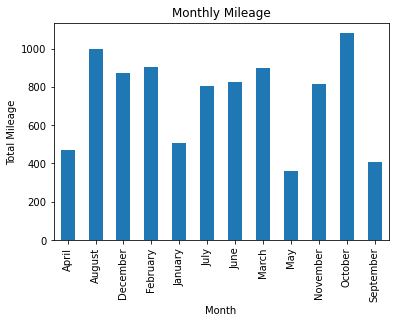

In [185]:
#Determining the total miles coverage per month:

Monthly_mileage = data2.groupby("Month")["Miles"].sum()
Monthly_mileage.plot(kind='bar')
plt.title("Monthly Mileage")
plt.ylabel('Total Mileage')

In the month of December, the user has taken a large number of short rides while in the month of October, the user has taken a short number of rides but the rides are long.

In [186]:
#Determining the number of rides per week day:

data2.groupby("Day")["Start_Point"].count()

Day
Friday       198
Monday       173
Saturday     140
Sunday       140
Thursday     148
Tuesday      172
Wednesday    143
Name: Start_Point, dtype: int64

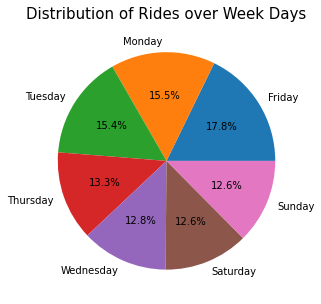

In [187]:
#Checking the percentage of the number of rides per day of the week:

types = data2["Day"].value_counts()
labels = types.index
values = types.values

plt.figure(figsize=(8, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.rc('font', size=12)
plt.title("Distribution of Rides over Week Days", fontsize=15)
plt.show()


The user has preferred 17.8 % of total Uber rides on Friday, followed by rides on Monday and Tuesday. On rest of the days, the user has taken almost similar number of rides. The distribution is almost similar over all the week days.

Out of 1114 rides, there is almost similar distribution of the rides on all the week days.

In [188]:
#Identifying the locations which are the farthest and the nearest

data2.groupby(['Start_Point','Stop_Point'])['Miles'].sum().sort_values()

Start_Point       Stop_Point      
Soho              Tribeca               0.5
Katunayaka        Katunayaka            0.5
Central           West Berkeley         0.6
Sunnyside         Ingleside             0.7
Medical Centre    Tudor City            0.7
                                      ...  
Morrisville       Cary                350.4
Raleigh           Cary                365.7
Cary              Morrisville         376.9
                  Durham              390.0
Unknown Location  Unknown Location    912.1
Name: Miles, Length: 344, dtype: float64

This indicates that except those rides for which locations are unknown, Cary to Durham distance is the maximum distance ride followed by Cary to Morrisville while Soho to Tribeca has the minimum distance between them.

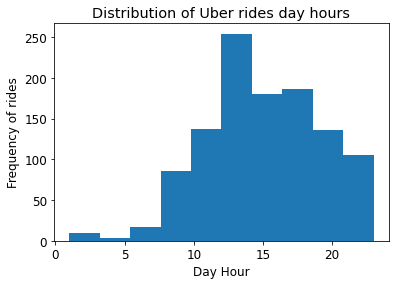

In [189]:
#Checking the preferred time of the day for Uber rides:

data2['Hour'].plot.hist()
plt.title('Distribution of Uber rides day hours')
plt.xlabel('Day Hour')
plt.ylabel('Frequency of rides')
plt.show()

From the plot, it is evident that the user takes Uber rides mostly during the day and evening hours. A very few rides have been taken in the early morning.

Text(0, 0.5, 'Number of rides')

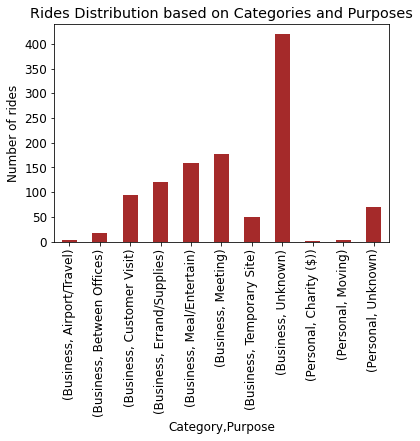

In [190]:
#Distribution of rides on the basis of their categories and purposes

Distribution = data2.groupby(["Category", "Purpose"])["Miles"].count()
Distribution.plot(kind='bar', color = 'brown')
plt.title("Rides Distribution based on Categories and Purposes")
plt.ylabel('Number of rides')

For most of the rides (400+ rides), the purpose is unknown and the user has travelled those rides mainly for business reasons.

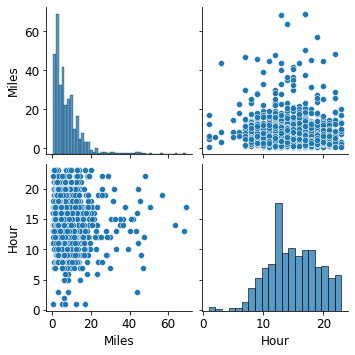

In [191]:
# Identifying is there any relationship between the rides mileage and the hour of the day at which the ride is taken:
sns.pairplot(data2, diag_kind = 'hist', vars = ['Miles', 'Hour'])


This clearly indicates that most of the rides for which the mileage is less than 20 miles, have been taken in the day and evening hours.

<AxesSubplot:>

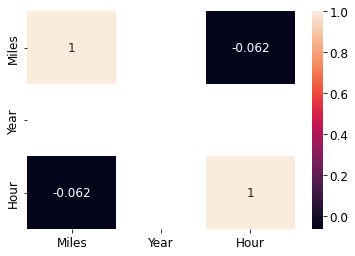

In [192]:
sns.heatmap(data2.corr(), annot=True)

It seems that the mileage of the ride is poorly correlated with the time at which the ride is taken. 

<AxesSubplot:title={'center':'Miles versus Ride Duration'}, xlabel='Ride_Duration', ylabel='Miles'>

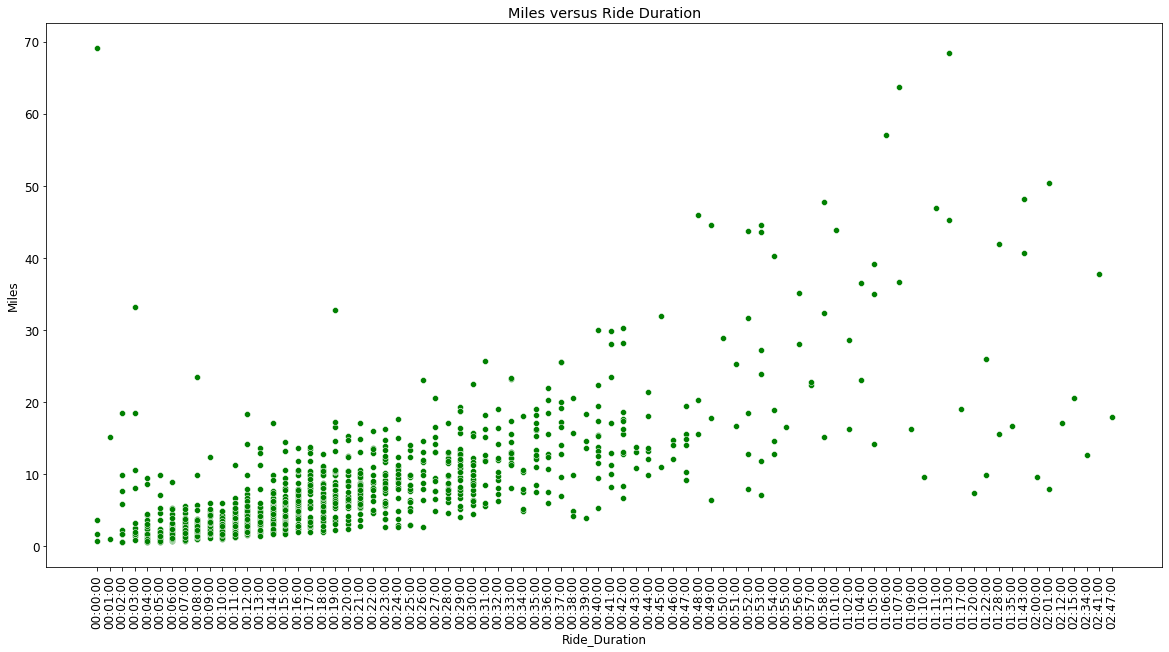

In [193]:
#Miles versus Ride Duration plot

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Miles versus Ride Duration")

sorted_data2 = data2.sort_values(by='Ride_Duration')
sns.scatterplot(x="Ride_Duration", y="Miles", data=sorted_data2, color = 'green')


Text(0.5, 1.0, 'Monthly and Daily Rides Distribution')

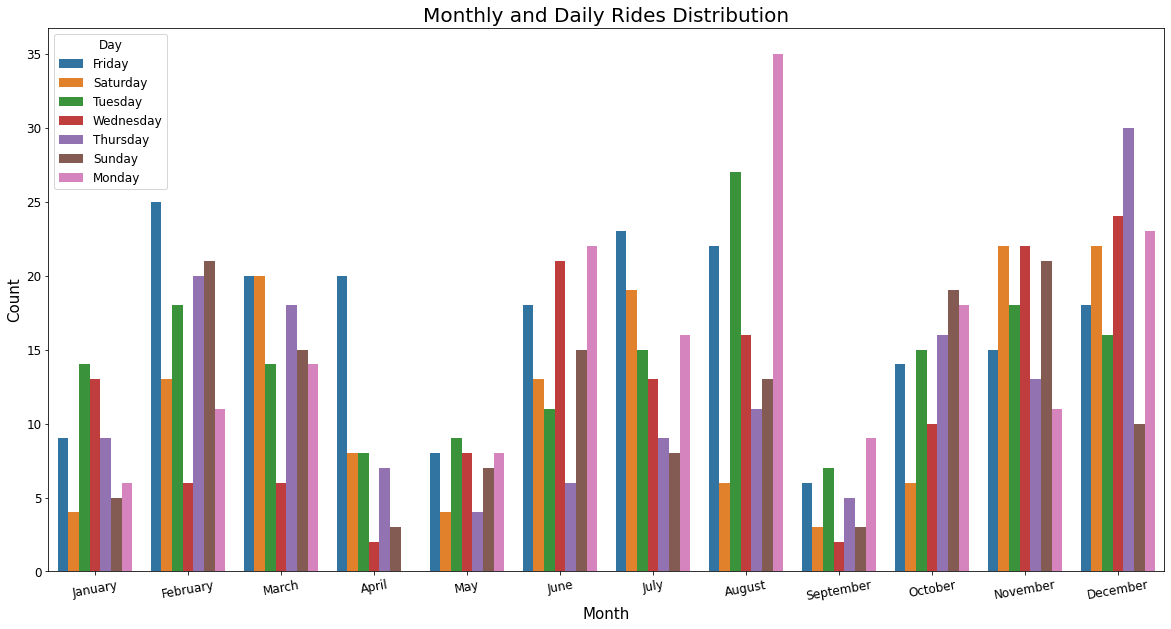

In [194]:
#Monthly and daily distribution of the rides

plt.figure(figsize=(20,10))
a = sns.countplot(x='Month', data = data2, hue = 'Day')
a.set_xticklabels(a.get_xticklabels(), rotation=10)
a.set_xlabel("Month", fontsize = 15)
a.set_ylabel("Count", fontsize = 15)
a.set_title('Monthly and Daily Rides Distribution', fontsize = 20)

Even though, the overall distribution of the rides over all the week days is similar, it is clearly seen from this plot that for each month, the daily distribution of rides is different.

### Insights

From the Exploratory Data Analysis of the Uber rides data, following insights can be made:

1. The user seems to be a potential customer for Uber as the average ride he takes per day is 3.
2. The distribution of the user's Uber rides seems interesting. Having overall similar distribution of rides on all the week days, December is the month when user has taken a lot of short rides while October is the month when the user has taken a small number of long rides.
3. The percentage that this user cancels the ride is very very low (around 0.3% ).
4. Most of the pickups and dropoffs occurred at Cary, Morrisville, Whitebridge, Islamabad etc. other than the unknown locations which indicates round rides and the user has covered 25% round rides.
5. The longest ride duration is 2 hours 47 minutes while the maximum miles covered by the user is 69.1 miles.
6. The user has taken Uber rides mainly for Business reasons. For mostly rides, the purpose is unknown. Besides this, main purposes include meeting and meal or entertainment.
7. The average distance covered by the user is around 8 miles.
8. The user travels by Uber mostly during the day and evening hours. 
9. Cary to Durham distance is the maximum distance ride followed by Cary to Morrisville while Soho to Tribeca has the minimum distance between them, except those rides whose locations are unknown.
10. The user has covered 40 very short rides (having mileage <= 1 mile) out of 1114 rides.